linear regression

In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score




In [ ]:
df=pd.read_csv("Housing.csv")

In [ ]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

split data

In [ ]:
X=df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]#INDEPENDENT
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
y=df['price']
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


split into 80% 20%

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)#X is independent, y is target

In [ ]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
287,5500,3,1,2,yes,no,no,no,yes,0,no,unfurnished
412,2610,3,1,2,yes,no,yes,no,no,0,yes,unfurnished
236,2870,2,1,2,yes,yes,yes,no,no,0,yes,semi-furnished
101,5500,3,1,3,yes,no,no,no,no,1,yes,unfurnished
63,6360,4,2,3,yes,no,no,no,yes,2,yes,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
69,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
544,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
539,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
26,6000,3,2,4,yes,yes,yes,no,yes,0,yes,semi-furnished


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)#won't find patterns without shuffle
X_train


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
431,3180,4,1,2,yes,no,yes,no,yes,0,no,unfurnished
432,6060,3,1,1,yes,yes,yes,no,no,0,no,furnished
433,3480,4,1,2,no,no,no,no,no,1,no,semi-furnished
434,3792,4,1,2,yes,no,no,no,no,0,no,semi-furnished


In [ ]:
y_test

,price
436,3290000
437,3290000
438,3255000
439,3255000
440,3234000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [ ]:
X_train.shape,X_test.shape

((436, 12), (109, 12))

In [ ]:
y_train.shape,y_test.shape

((436,), (109,))

model training with linear equation

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train.shape[0] == y_train.shape[0]

True

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Create a column transformer to apply one-hot encoding to categorical features
# 'passthrough' keeps the remaining numerical columns as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the transformations to the training and testing data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)


model=LinearRegression()
model.fit(X_train_encoded,y_train)

LinearRegression()

In [ ]:
model.coef_

array([-2.52986305e+05,  2.52986305e+05, -1.36945457e+05,  1.36945457e+05,
       -1.56884438e+05,  1.56884438e+05, -4.36383499e+05,  4.36383499e+05,
       -3.84945422e+05,  3.84945422e+05, -2.70791791e+05,  2.70791791e+05,
        9.64724522e+04,  2.35275154e+04, -1.19999968e+05,  2.28588520e+02,
        1.08604686e+05,  9.72130925e+05,  4.44531652e+05,  2.68473162e+05])

y=mx+c
y=m1x1+m2x2+....m12x12+c

In [ ]:
# Get feature names after one-hot encoding
encoded_feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame of coefficients with the correct feature names as index
pd.DataFrame(model.coef_, index=encoded_feature_names, columns=['coefficients'])

,coefficients
onehot__mainroad_no,-252986.305118
onehot__mainroad_yes,252986.305118
onehot__guestroom_no,-136945.456729
onehot__guestroom_yes,136945.456729
onehot__basement_no,-156884.438492
onehot__basement_yes,156884.438492
onehot__hotwaterheating_no,-436383.499114
onehot__hotwaterheating_yes,436383.499114
onehot__airconditioning_no,-384945.422255
onehot__airconditioning_yes,384945.422255


model prediction

In [ ]:
y_pred_train=model.predict(X_train_encoded)
y_pred_test=model.predict(X_test_encoded)

In [ ]:
model.predict(X_train_encoded)

array([ 8040263.24934063, 10507972.65212468,  7538674.84768746,
        8196260.71828106,  6669676.88108119,  8273837.20743001,
        9649143.57233554,  8618581.24207104,  7366700.6562866 ,
        7783392.71875926,  8150006.50757108,  8319274.25066053,
        7055441.48685142,  6260957.17236681,  6194208.44418713,
        5228354.48830543,  7511003.22021452,  8081482.2345716 ,
        6574814.61794766,  6917120.29343008,  5608488.0875381 ,
        6811623.09139089,  5992078.14912039,  6610966.79218889,
        7260995.48733622,  7982233.49084881,  8029363.04678721,
        4750168.1061438 ,  7484077.22812342,  7129192.41812422,
        7630706.58198946,  6693523.59285216,  6746643.59570701,
        6916758.38076529,  6377227.06354309,  7738599.45498334,
        7780234.043471  ,  8304381.18029137,  6595298.5035189 ,
        7277197.52236335,  6092946.52748783,  7596940.06024243,
        7403261.00486259,  6775779.83980787,  7350142.45916053,
        6455588.02297549,  7241537.77330

In [ ]:
X_train[:3]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [ ]:
y_train[:3]

,price
0,13300000
1,12250000
2,12250000


In [ ]:
y_pred_train[:3]

array([ 8040263.24934063, 10507972.65212468,  7538674.84768746])

In [ ]:
X_test[:3]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
436,2145,3,1,2,yes,no,yes,no,no,0,yes,furnished
437,5880,3,1,1,yes,no,no,no,no,1,no,unfurnished
438,4500,2,1,1,no,no,no,no,no,0,no,semi-furnished


In [ ]:
y_test[:3]

,price
436,3290000
437,3290000
438,3255000


In [ ]:
y_pred_test[:3]

array([4316123.25358718, 3922018.0064996 , 2867042.874298  ])

model evaluation

for training data

In [ ]:
mean_squared_error(y_train,y_pred_train)#large value because squared


1182778110605.3213

In [ ]:
np.sqrt(mean_squared_error(y_train,y_pred_train))

np.float64(1087556.0264213155)

In [ ]:
mean_absolute_error(y_train,y_pred_train)


786460.070754162

In [ ]:
r2_score(y_train,y_pred_train)

0.607940845168992

for training data

In [ ]:
def training_evaluation(actual,predicted):
    mse=mean_squared_error(actual,predicted)
    rmse=np.sqrt(mean_squared_error(actual,predicted))
    mae=mean_absolute_error(actual,predicted)
    r2=r2_score(actual,predicted)
    print(f"MSE:{mse}")
    print(f"RMSE:{rmse}")
    print(f"MAE:{mae}")
    print(f"R2:{r2}")


In [ ]:
training_evaluation(y_train,y_pred_train)

MSE:1182778110605.3213
RMSE:1087556.0264213155
MAE:786460.070754162
R2:0.607940845168992


for test data

In [ ]:
def test_evaluation(actual,predicted):
    mse=mean_squared_error(actual,predicted)
    rmse=np.sqrt(mean_squared_error(actual,predicted))
    mae=mean_absolute_error(actual,predicted)
    r2=r2_score(actual,predicted)
    print(f"MSE:{mse}")
    print(f"RMSE:{rmse}")
    print(f"MAE:{mae}")
    print(f"R2:{r2}")


In [ ]:
test_evaluation(y_test,y_pred_test)

MSE:1048582305860.3239
RMSE:1024003.0790287321
MAE:821318.9056217299
R2:-5.164065953933033


[]

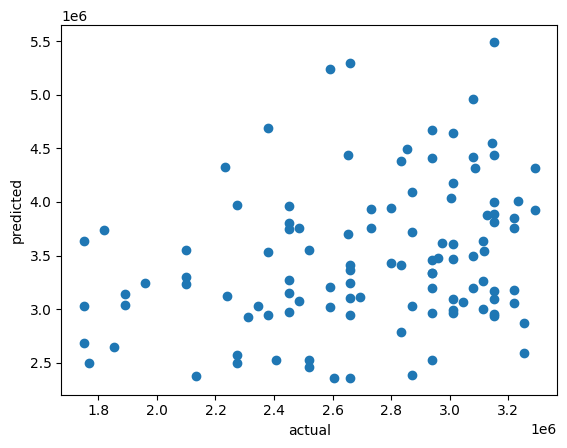

In [ ]:
plt.scatter(y_test,y_pred_test)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.plot()

In [ ]:
y_train.min()

3290000

In [ ]:
y_train.max()

13300000

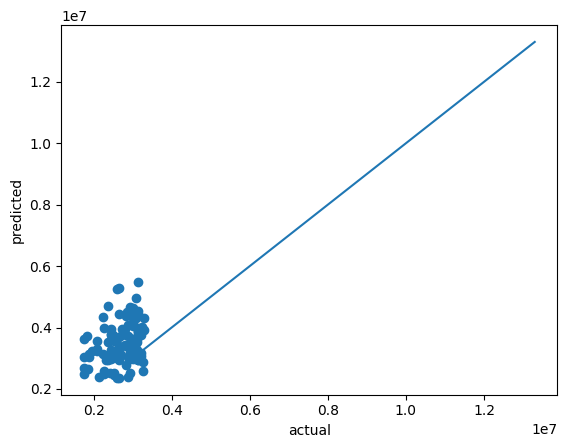

In [ ]:
plt.scatter(y_test,y_pred_test)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()])